In [22]:
import boto3
from PIL import Image
import io
from IPython.display import display, Image
import cv2
import numpy as np

In [23]:
# sudo apt-get update
# sudo apt-get install libgl1-mesa-glx
# sudo apt-get update
# sudo apt-get install libglib2.0-0
# pip install --upgrade opencv-python-headless  # Use opencv-python if you need GUI features

In [24]:
def read_aws_credentials(filename):
    credentials = {}
    with open(filename, 'r') as file:
        for line in file:
            key, value = line.strip().split('=')
            credentials[key] = value

    return credentials

creds_file = 'creds'
credentials = read_aws_credentials(creds_file)
aws_access_key_id = credentials.get('aws_access_key_id')
aws_secret_access_key = credentials.get('aws_secret_access_key')

In [25]:
import boto3
s3_client = boto3.client(
    's3',
    region_name='eu-central-1',
    aws_access_key_id=aws_access_key_id,
    aws_secret_access_key=aws_secret_access_key
)

In [26]:
bucket_name = 'mypicturesmalefemale'
female_photos = []
male_photos = []
def findPictures(bucket_name, prefix):
    response = s3_client.list_objects_v2(Bucket=bucket_name, Prefix=prefix)
    while True:
        for obj in response.get('Contents', []):
            if obj['Key'].endswith('.jpg'):
                if prefix == "female/":
                    female_photos.append(obj['Key'])
                elif prefix == "male/":
                    male_photos.append(obj['Key'])
        if response['IsTruncated']:
            response = s3_client.list_objects_v2(
                Bucket=bucket_name, 
                Prefix=prefix, 
                ContinuationToken=response['NextContinuationToken']
            )
        else:
            break

In [27]:
findPictures(bucket_name, 'female/')
findPictures(bucket_name, 'male/')
print("Female photos:", female_photos)
print("Male photos:", male_photos)

Female photos: ['female/female_006982.jpg', 'female/female_006984.jpg', 'female/female_006985.jpg', 'female/female_006989.jpg', 'female/female_006990.jpg', 'female/female_006991.jpg', 'female/female_006992.jpg', 'female/female_006993.jpg', 'female/female_006994.jpg', 'female/female_006995.jpg', 'female/female_006999.jpg']
Male photos: ['male/male_006969.jpg', 'male/male_006970.jpg', 'male/male_006971.jpg', 'male/male_006973.jpg', 'male/male_006974.jpg', 'male/male_006975.jpg', 'male/male_006976.jpg', 'male/male_006978.jpg', 'male/male_006979.jpg', 'male/male_006980.jpg', 'male/male_006981.jpg']


### Dowloading haarcascade_frontalface Model

In [28]:
import urllib.request
url = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml"
haar_path = "haarcascade_frontalface_default.xml"
urllib.request.urlretrieve(url, haar_path)
print("Downloaded Haar Cascade for frontal face detection.")


Downloaded Haar Cascade for frontal face detection.


In [29]:
face_model = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
if face_model.empty():
    print("Failed to load the model. Check the file path.")
else:
    print("Model loaded successfully!")

Model loaded successfully!


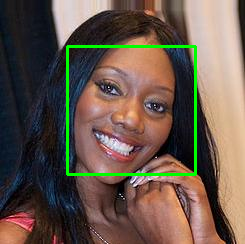

In [31]:
from PIL import Image

response = s3_client.get_object(Bucket=bucket_name, Key=female_photos[5])
image_content = response['Body'].read()
image_np_array = np.frombuffer(image_content, dtype=np.uint8)
img = cv2.imdecode(image_np_array, cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_model = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
if face_model.empty():
    raise Exception("Failed to load the face detection model!")
face_rect = face_model.detectMultiScale(gray, 1.3, 5)

for x, y, w, h in face_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
image_pil = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
image_pil.show()


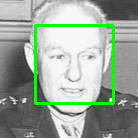

In [33]:
response = s3_client.get_object(Bucket=bucket_name, Key=male_photos[1])
image_content = response['Body'].read()
image_np_array = np.frombuffer(image_content, dtype=np.uint8)
img = cv2.imdecode(image_np_array, cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_model = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
if face_model.empty():
    raise Exception("Failed to load the face detection model!")
face_rect = face_model.detectMultiScale(gray, 1.3, 5)
for x, y, w, h in face_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
image_pil = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
image_pil.show()